In [36]:
import tensorflow as tf
import os

In [37]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [38]:
tf.config.list_physical_devices('GPU')

[]

In [39]:
import cv2
import imghdr

In [2]:
data_dir = 'data' 


In [46]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [47]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\damaged\-amazon-box-with-special-caution-sign-and-instruction-for-transportation-car.jpg
Image not in ext list data\damaged\0ajd4rkg_amazon-stun-gun_625x300_01_February_19.jpg
Image not in ext list data\damaged\amazon-brand-online-delivery-box-145815475_prevstill.jpeg
Image not in ext list data\damaged\bigstock-Amazon-Parcel-Opened-On-Home-P-82975889-smaller-880x495.jpg
Image not in ext list data\damaged\damaged-cardboard-box-hole-on-260nw-2072815211.jpg
Image not in ext list data\damaged\maged-amazon-prime-cardboard-parcel-box-with-sticker-saying-unlimited-fast-d.jpg
Image not in ext list data\damaged\man-unboxing-amazon-prime-damaged-footage-083427240_iconl.jpeg
Image not in ext list data\intact\11cpbsog_delivery-boxes-generic_625x300_23_June_21.jpg
Image not in ext list data\intact\165088148-milan-italy-december-14-2020-lot-of-amazon-packages-3d-rendering.jpg
Image not in ext list data\intact\amazon-e-commerce-3-ply-boxes-500x500.jpeg
Image not in ext list

In [48]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 178 files belonging to 2 classes.


In [50]:
data_iterator = data.as_numpy_iterator()

In [51]:
data_iterator

In [52]:
batch= data_iterator.next()

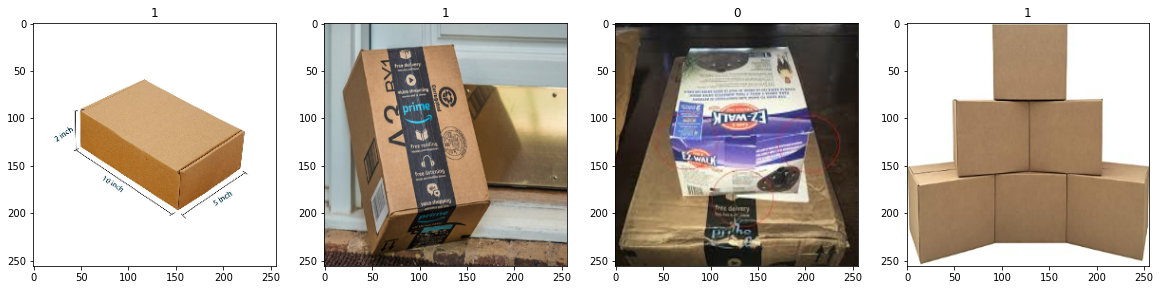

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [54]:
data = data.map(lambda x,y: (x/255, y))

In [56]:
len(data)

6

In [61]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [58]:
train_size

4

In [59]:
val_size

1

In [60]:
test_size

0

In [62]:
test_size

1

In [63]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [64]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [66]:
model = Sequential()

In [67]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [70]:
logdir='logs'

In [71]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 1.0129 - accuracy: 0.4766 - val_loss: 0.8233 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.6860 - accuracy: 0.5781 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6590 - accuracy: 0.5547 - val_loss: 0.6123 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6171 - accuracy: 0.6406 - val_loss: 0.5709 - val_accuracy: 0.5938
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.5765 - accuracy: 0.6797 - val_loss: 0.4575 - val_accuracy: 0.8438
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.4551 - accuracy: 0.8125 - val_loss: 0.3517 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.3670 - accuracy: 0.8906 - val_loss: 0.3406 - val_accuracy: 0.9375
Epoch 8/20
4/4 [=========================

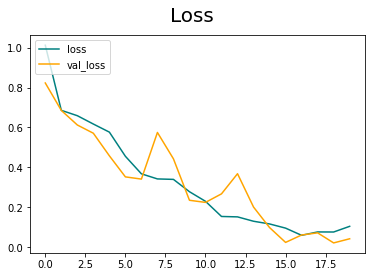

In [73]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

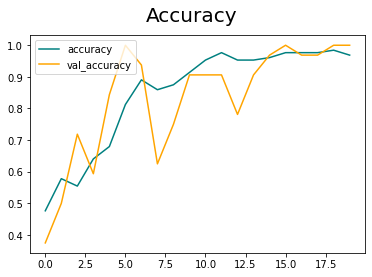

In [74]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [75]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [76]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [77]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 165ms/step


In [78]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [79]:
import cv2

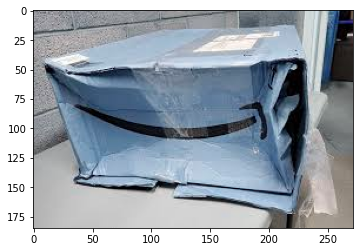

In [80]:
img = cv2.imread('images.jpg')
plt.imshow(img)
plt.show()